In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
batch_size = 32
img_height = 300
img_width = 300
data_dir = "C:/Users/Alihan/Desktop/datasets/model_v3"

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3105 files belonging to 3 classes.
Using 2484 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3105 files belonging to 3 classes.
Using 621 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2']


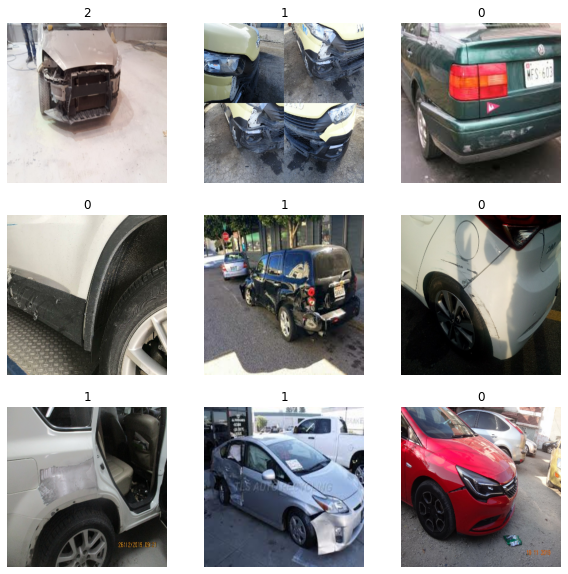

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 300, 300, 3)
(32,)


In [18]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [20]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
num_classes = 3

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes)
])

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [15]:
epochs = 4
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size)

Epoch 1/40
78/78 [==============================] - 14s 179ms/step - loss: 0.9977 - accuracy: 0.4924 - val_loss: 0.8846 - val_accuracy: 0.5588
Epoch 2/40
78/78 [==============================] - 4s 47ms/step - loss: 0.8479 - accuracy: 0.5982 - val_loss: 0.8623 - val_accuracy: 0.6071
Epoch 3/40
78/78 [==============================] - 4s 47ms/step - loss: 0.7616 - accuracy: 0.6526 - val_loss: 0.8968 - val_accuracy: 0.5620
Epoch 4/40
78/78 [==============================] - 4s 47ms/step - loss: 0.6095 - accuracy: 0.7444 - val_loss: 0.9535 - val_accuracy: 0.5862
Epoch 5/40
78/78 [==============================] - 4s 47ms/step - loss: 0.4384 - accuracy: 0.8289 - val_loss: 1.2034 - val_accuracy: 0.5717
Epoch 6/40
78/78 [==============================] - 4s 47ms/step - loss: 0.3879 - accuracy: 0.8482 - val_loss: 1.1896 - val_accuracy: 0.5588
Epoch 7/40
78/78 [==============================] - 4s 47ms/step - loss: 0.2375 - accuracy: 0.9138 - val_loss: 1.6152 - val_accuracy: 0.5411
Epoch 8/40


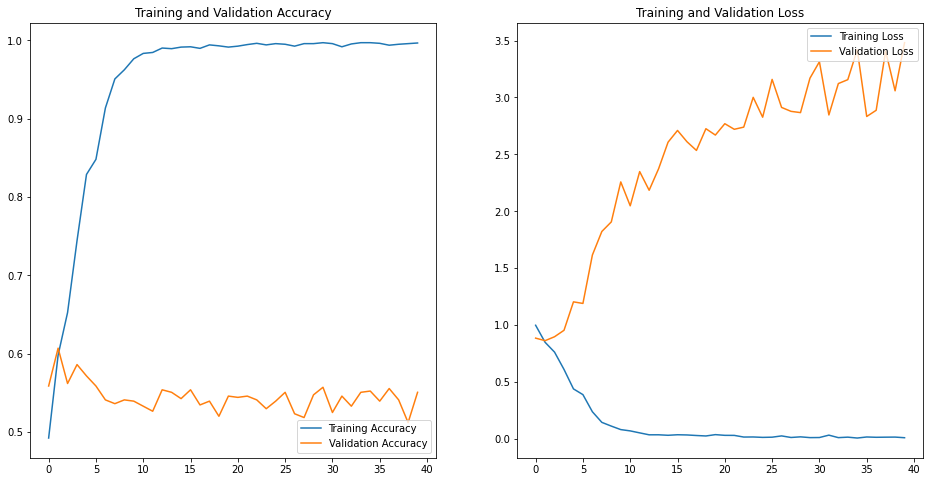

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomCrop(250,250)
])

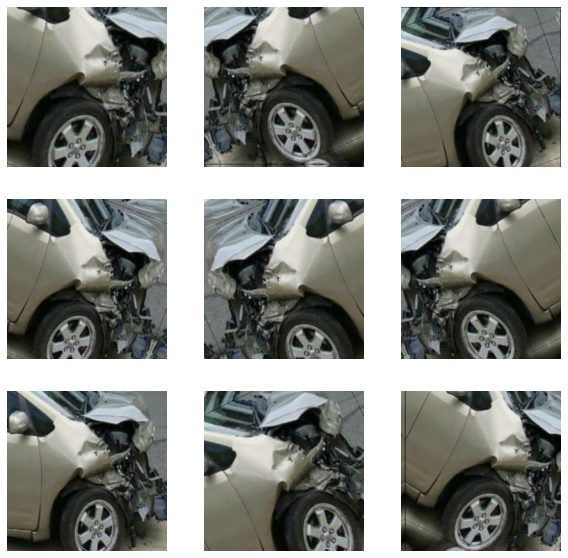

In [67]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [79]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3)
])

In [80]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
epochs = 80

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/Alihan/Desktop/datasets",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/80
78/78 [==============================] - 4s 55ms/step - loss: 0.7662 - accuracy: 0.6514 - val_loss: 0.8672 - val_accuracy: 0.6167
Epoch 2/80
78/78 [==============================] - 4s 50ms/step - loss: 0.7524 - accuracy: 0.6691 - val_loss: 0.8441 - val_accuracy: 0.6296
Epoch 3/80
78/78 [==============================] - 3s 44ms/step - loss: 0.7432 - accuracy: 0.6574 - val_loss: 0.9341 - val_accuracy: 0.5926
Epoch 4/80
78/78 [==============================] - 3s 40ms/step - loss: 0.7650 - accuracy: 0.6473 - val_loss: 0.9604 - val_accuracy: 0.5829
Epoch 5/80
78/78 [==============================] - 4s 46ms/step - loss: 0.7691 - accuracy: 0.6353 - val_loss: 0.9508 - val_accuracy: 0.5878
Epoch 6/80
78/78 [==============================] - 3s 43ms/step - loss: 0.7514 - accuracy: 0.6473 - val_loss: 0.9233 - val_accuracy: 0.5926
Epoch 7/80
78/78 [==============================] - 3s 44ms/step - loss: 0.7591 - accuracy: 0.6401 - val_loss: 0.8386 - val_accuracy: 0.6296
Epoch 8/80
78

Epoch 59/80
78/78 [==============================] - 4s 52ms/step - loss: 0.6214 - accuracy: 0.7226 - val_loss: 0.8310 - val_accuracy: 0.6264
Epoch 60/80
78/78 [==============================] - 4s 53ms/step - loss: 0.6481 - accuracy: 0.7134 - val_loss: 0.7694 - val_accuracy: 0.6441
Epoch 61/80
78/78 [==============================] - 5s 63ms/step - loss: 0.6308 - accuracy: 0.7182 - val_loss: 0.7697 - val_accuracy: 0.6490
Epoch 62/80
78/78 [==============================] - 4s 50ms/step - loss: 0.6248 - accuracy: 0.7170 - val_loss: 0.7911 - val_accuracy: 0.6409
Epoch 63/80
78/78 [==============================] - 4s 51ms/step - loss: 0.6169 - accuracy: 0.7307 - val_loss: 0.7963 - val_accuracy: 0.6264
Epoch 64/80
78/78 [==============================] - 5s 60ms/step - loss: 0.6163 - accuracy: 0.7307 - val_loss: 0.7684 - val_accuracy: 0.6602
Epoch 65/80
78/78 [==============================] - 4s 47ms/step - loss: 0.6294 - accuracy: 0.7210 - val_loss: 0.8206 - val_accuracy: 0.6345
Epoch 

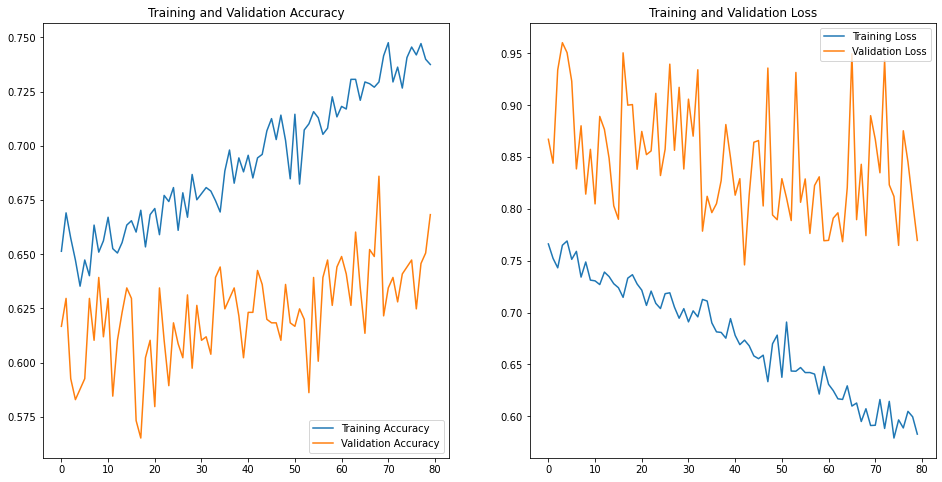

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
model.load_weights("C:/Users/Alihan/Desktop/datasets")

In [89]:
model.save("model_3.h5")

In [9]:
model = keras.models.load_model("C:/Users/Alihan/Desktop/datasets/model_v3.h5")

In [88]:
model.evaluate(val_ds)

20/20 [==============================] - 0s 14ms/step - loss: 0.7742 - accuracy: 0.6860


[0.7742482423782349, 0.6859903335571289]